In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import streamlit as st
from PIL import Image
plt.style.use('fivethirtyeight')

In [2]:
st.write('''
# STOCK PRICE PREDICTOR

**Karami Milad**
''')
img=Image.open('C:/Users/lenovo/trade.jpg')
st.image(img,width=600)

2023-11-09 22:43:02.149 
  command:

    streamlit run C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [3]:
st.sidebar.header('INSERT DATA')
def data():
    symbol=st.sidebar.selectbox('select the symbol',['AMZN','FOOLAD','KHODRO','TSLA'])
    return symbol

In [6]:
def get_data(symbol):
    if symbol=='FOOLAD':
        df=pd.read_csv('C:/Users/lenovo/foolad.csv')
    elif symbol=='KHODRO':
        df=pd.read_csv('C:/Users/lenovo/khodro.csv')
    elif symbol=='AMZN':
        df=pd.read_csv('C:/Users/lenovo/amzn.csv')
    elif symbol=='TSLA':
        df=pd.read_csv('C:/Users/lenovo/tsla.csv')
    df=df.set_index(pd.DatetimeIndex(df['Date'].values))  
    return df

In [7]:
symbol =data()
df=get_data(symbol)
data=df.filter(['Close'])
dataset=data.values
training_data_len=math.ceil(len(dataset)*0.8)
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

In [8]:
training_data=scaled_data[0:training_data_len , :]

In [9]:
xtrain=[]
ytrain=[]
n=60

In [10]:
for i in range(n,len(training_data)):
    xtrain.append(training_data[i-n:i , 0])
    ytrain.append(training_data[i,0])

In [11]:
xtrain , ytrain = np.array(xtrain),np.array(ytrain)

In [12]:
xtrain=np.reshape(xtrain,(xtrain.shape[0],xtrain.shape[1],1))

In [13]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(xtrain.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [14]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(xtrain,ytrain,batch_size=1,epochs=1)

4571/4571 [==============================] - 152s 32ms/step - loss: 4.1925e-05


In [15]:
test_data=scaled_data[training_data_len - n : , :]
xtest=[]
ytest=dataset[training_data_len: , :]
for i in range(n,len(test_data)):
    xtest.append(test_data[i-n:i,0]) 

In [16]:
xtest=np.array(xtest)
xtest=np.reshape(xtest,(xtest.shape[0],xtest.shape[1],1))

In [17]:
prediction=model.predict(xtest)
prediction=scaler.inverse_transform(prediction)
rmse =np.sqrt(np.mean(((prediction- ytest)**2)))
st.header('RMSE: ')
st.success(rmse)

37/37 [==============================] - 3s 32ms/step


DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [18]:
train=data[:training_data_len]
valid=data[training_data_len:]
valid['prediction']=prediction

C:\Users\lenovo\AppData\Local\Temp/ipykernel_20112/3517524298.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['prediction']=prediction


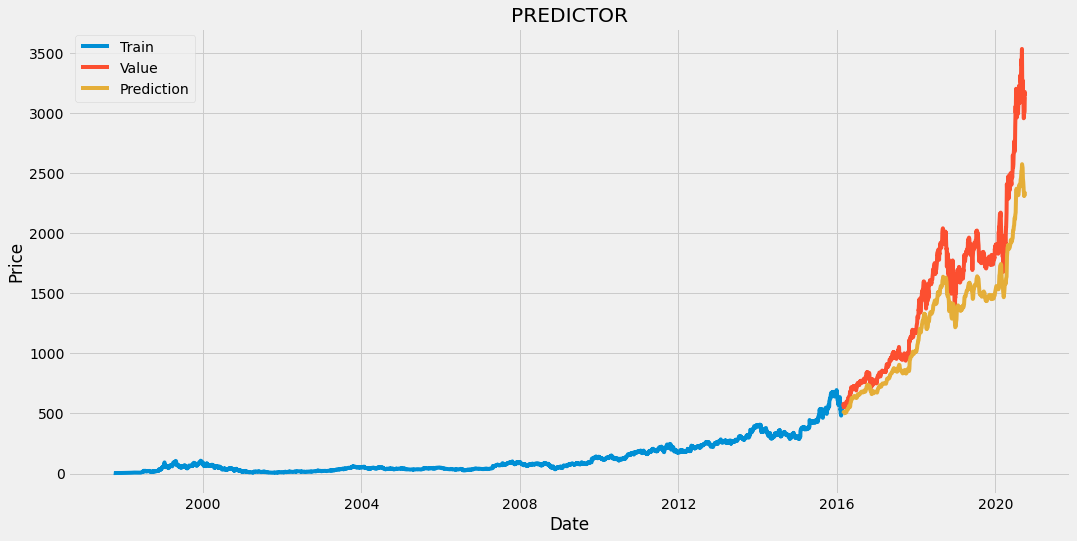

In [19]:
plt.figure(figsize=(16,8))
plt.title('PREDICTOR')
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(train['Close'])
plt.plot(valid[['Close','prediction']])
plt.legend(['Train','Value','Prediction'])
plt.savefig('accuracy.png')
plt.show()

In [20]:
st.header('STOCK PREDICTOR ACCURACY : ')
imag=Image.open('C:/Users/lenovo/accuracy.png')
st.image(imag,width=600)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [21]:
newdf=data[-60:].values

In [22]:
snewdf=scaler.transform(newdf)

In [23]:
xtest=[]
xtest.append(snewdf)
xtest=np.array(xtest)
xtest=np.reshape(xtest,(xtest.shape[0],xtest.shape[1],1))

In [24]:
pred=model.predict(xtest)
pred=scaler.inverse_transform(pred)
st.header('predicted price for next day:')
st.success(pred)

1/1 [==============================] - 0s 37ms/step


DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)